In [1]:
timezone = {#地区时区
  "United States": "UTC-5:00",
  "Netherlands": "UTC+1:00",
  "Switzerland": "UTC+1:00",
  "Germany": "UTC+1:00",
  "China": "UTC+8:00",
  "France": "UTC+1:00",
  "United Kingdom": "UTC±0:00",
  "Canada": "UTC-5:00",
  "Australia": "UTC+10:00",
  "Bulgaria": "UTC+2:00",
  "Malaysia": "UTC+8:00",
  "Finland": "UTC+2:00",
  "South Korea": "UTC+9:00",
  "Japan": "UTC+9:00",
  "Italy": "UTC+1:00",
  "Egypt": "UTC+2:00",
  "New Zealand": "UTC+12:00",
  "Belgium": "UTC+1:00",
  "Poland": "UTC+1:00",
  "Hungary": "UTC+1:00",
  "Austria": "UTC+1:00",
  "Lebanon": "UTC+2:00",
  "Denmark": "UTC+1:00",
  "Colombia": "UTC-5:00",
  "Indonesia": "UTC+7:00",
  "United Arab Emirates": "UTC+4:00",
  "Ecuador": "UTC-5:00",
  "Sweden": "UTC+1:00",
  "India": "UTC+5:30",
  "Czechia": "UTC+1:00",
  "Spain": "UTC+1:00",
  "Pakistan": "UTC+5:00",
  "Brazil": "UTC-3:00",
  "Kenya": "UTC+3:00",
  "Russia": "UTC+3:00",
  "Vietnam": "UTC+7:00",
  "Singapore": "UTC+8:00",
  "Portugal": "UTC±0:00",
  "Turkiye": "UTC+3:00",
  "Ireland": "UTC±0:00",
  "Greece": "UTC+2:00",
  "Ethiopia": "UTC+3:00",
  "Georgia": "UTC+4:00",
  "Norway": "UTC+1:00",
  "Tunisia": "UTC+1:00",
  "Estonia": "UTC+2:00",
  "Israel": "UTC+2:00",
  "South Africa": "UTC+2:00",
  "Slovenia": "UTC+1:00",
  "Lithuania": "UTC+2:00",
  "Taiwan": "UTC+8:00",
  "Hong Kong": "UTC+8:00"
}

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
#文件未上传github因为已经大于100MB
data = pd.read_csv(r"./data/users_combined_info_500.csv")
v = []
tmpl = data['country']
for x in tmpl:
    if x not in timezone.keys():
        v.append("Unknow")
    else:
        v.append(timezone[x])

data.insert(loc=0,column='timezone',value=v)

#提取每个人的信息
feature = ['user_id','name','location','country','timezone']
num_data = pd.DataFrame(data[feature])
num_data=num_data.drop_duplicates().reset_index(drop=True)

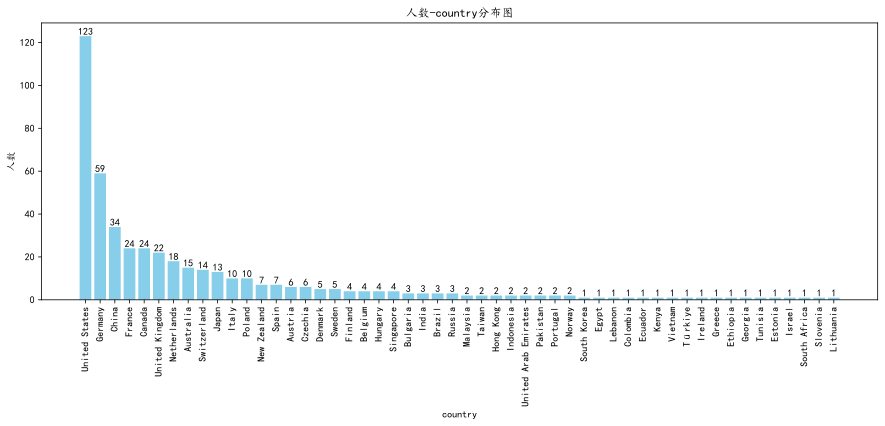

In [3]:
plt.rcParams['font.sans-serif'] = 'kaiti'
plt.rcParams['axes.unicode_minus']=False
country = dict()

def getNum(loc:str,save:dict):
    for _ in num_data[loc]:
        if pd.isna(_):
            continue
        if _ in save.keys():
            save[_]+=1
        else:
            save[_]=1

#用于画loc列元素出现次数条形图
def showNum(loc:str,save:dict,num:int):#num为展示前num个数据，-1为全部
    getNum(loc,save)
    save = dict(sorted(save.items(),key=lambda item:item[1],reverse=True))
    if num==-1:
        num=len(save.items())
    save = dict(list(save.items())[:num])
    plt.figure(figsize=(15,5))
    pg=plt.bar(range(len(save.keys())),save.values(),color='skyblue')
    plt.bar_label(pg,label_type='edge')
    plt.xticks(range(len(save.keys())),save.keys(), rotation='vertical')
    plt.title("人数-{}分布图".format(loc))
    plt.ylabel('人数')
    plt.xlabel('{}'.format(loc))

#统计每个内地区开发者情况(前30多的)
def showLocationOfCountry(coun:str,loca:str):
    return
showNum('country',country,-1)
plt.show()

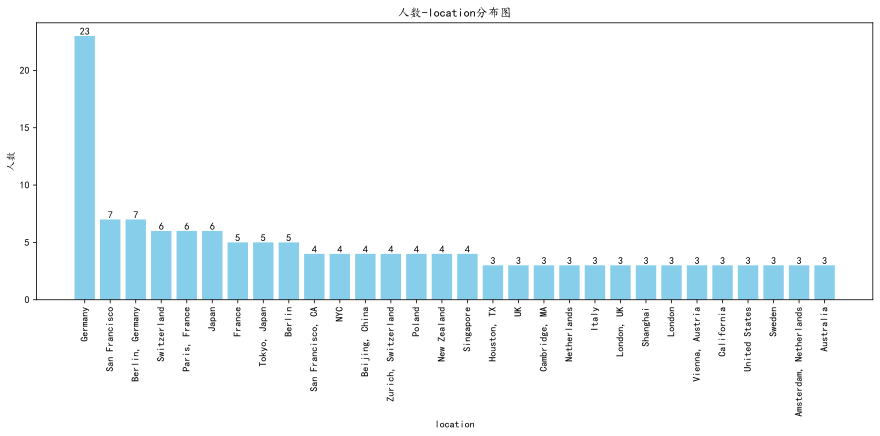

In [4]:
location = dict()
showNum('location',location,30)
plt.show()

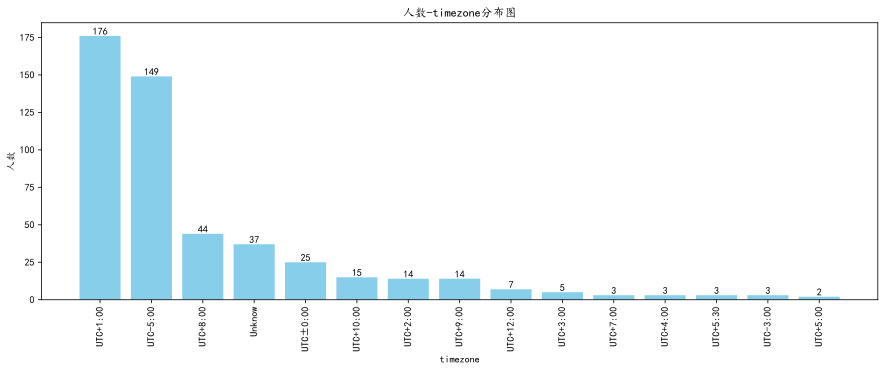

In [5]:
times = dict()
showNum("timezone",times,-1)